In [1]:
%%bash
source activate python2

bash: line 1: activate: No such file or directory


In [2]:
import numpy as np;
import networkx as nx;
import pandas as pd; 
from networkx.algorithms import bipartite; 
import matplotlib.pyplot as plt;

import seaborn as sns;
import matplotlib as mpl;

sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [3]:
data = np.load('ToggleDiscovery/SSA/toggleAry.npy')
print data[1][1].shape

(2,)


(10000, 2)

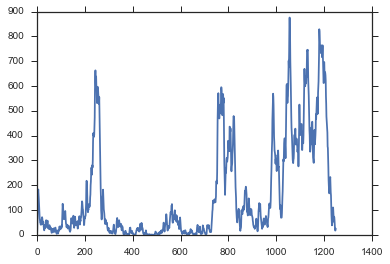

In [4]:
plt.plot(data[200,:,1])

data[:,200,:].shape

(10000, 1250, 2)


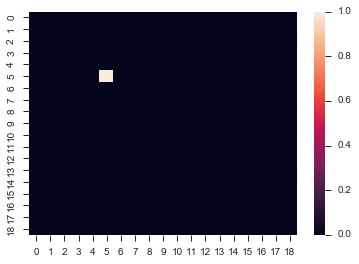

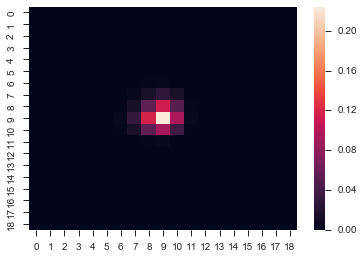

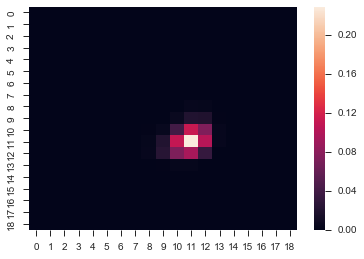

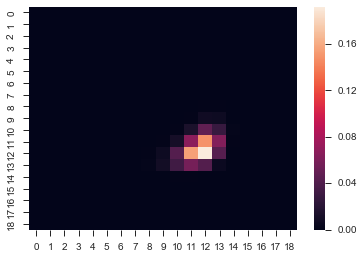

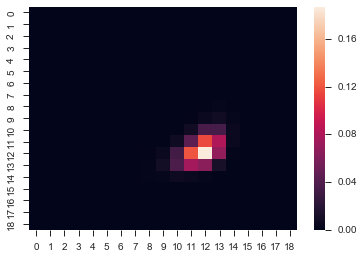

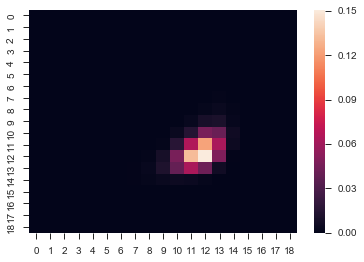

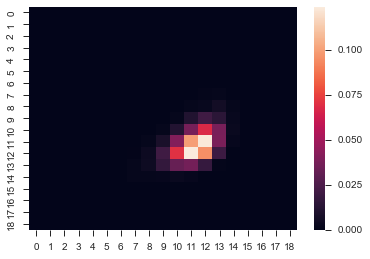

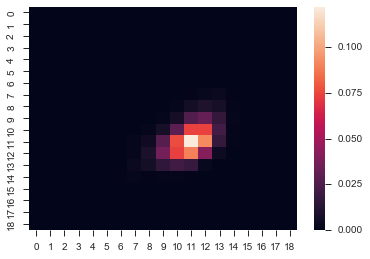

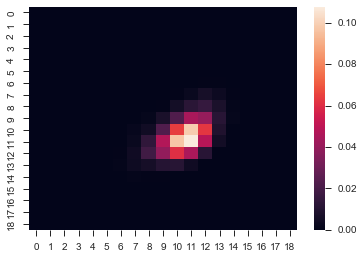

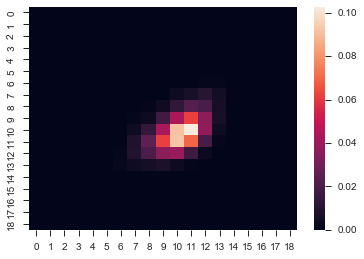

In [10]:
print data.shape
LacI = 0 
TetR = 1 
 
bin_seq = np.arange(0,3.5,.175)
TimeCoursePDF = []; 
samples = 100
for timepoint in range(0,1250):
    #All_Pair_CountsX = np.log10(data[:,timepoint,0]+1e1);
    #All_Pair_CountsY = np.log10(data[:,timepoint,1]+1e1);
    temp_data = np.log10(data[:,timepoint,:]+1e1);    
    temp_array  = np.histogramdd(temp_data,bins= [bin_seq]*temp_data.shape[1],normed=False);
    #print temp_array[0].shape
    total_count = np.sum(temp_array[0],axis=None);
    output = np.asarray(temp_array[0])/total_count;
    if (timepoint<10):
        plt.figure()
        try:
            sns.heatmap(output);
        except:
            print output
    TimeCoursePDF.append(output);

In [11]:
print TimeCoursePDF[2].shape
plt.close('all')

(19, 19)


In [12]:
for k in range(0,1000): 
    if k <100:
        fig1 = plt.figure()
        sns.heatmap(TimeCoursePDF[k])
        plt.savefig('heatmap_plots/Toggle' + repr(k) + '.jpg');
        plt.close()


In [17]:

def pth_moment(pdf,bin_sequence,marg_axis=0,p=1):
    
    n_dims = len(pdf.shape);
    
    if n_dims< marg_axis:
        print "Warning, axis specified for marginalization exceeds # of dimensions of PDF!"
    
    scaled_pdf = np.apply_along_axis(np.dot,marg_axis,pdf,np.power(bin_sequence[0:-1],p));
    output = np.sum(scaled_pdf,axis=None)

    return output; 

In [ ]:
#x = np.random.rand(3,1);
print x; 
print np.power(x,2.0)

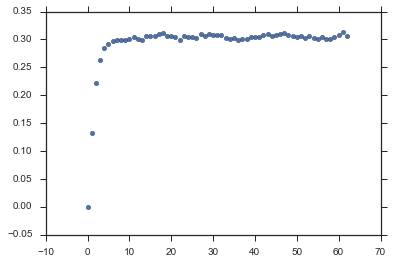

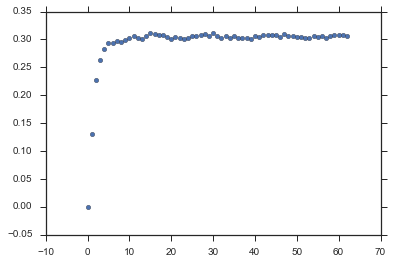

In [41]:
x_moment = []; 
y_moment = []; 
for k in range(0,len(TimeCoursePDF)):
    if k%20==0:
        This_PDF = TimeCoursePDF[k];
        mean_x = pth_moment(This_PDF,bin_seq,marg_axis=0,p=1);
        mean_y = pth_moment(This_PDF,bin_seq,marg_axis=1,p=1);
        moment_2_x = pth_moment(This_PDF,bin_seq,marg_axis=0,p=2);
        moment_2_y = pth_moment(This_PDF,bin_seq,marg_axis=1,p=2);
        var_x = moment_2_x - np.power(mean_x ,2.0)
        var_y = moment_2_y - np.power(mean_y,2.0);
        x_moment.append(var_x); 
        y_moment.append(var_y);

t = np.arange(0,len(x_moment),1)
plt.figure()
plt.scatter(t,y_moment);
plt.figure()
plt.scatter(t,x_moment);